# Cartopy + xarray - продолжение

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cf
LAND = cf.NaturalEarthFeature(category='physical', scale='50m', name='land',color = cf.COLORS['land'])
import xarray as xr

In [3]:
plt.rcParams.update({'figure.dpi':100})

In [4]:
ds = xr.open_dataset('/home/mizyuk/Data/REMSS/gulf_stream_20060101_20081231.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:       (lat: 239, lon: 478, time: 1096)
Coordinates:
  * lat           (lat) float32 34.0576 34.14549 34.23338 ... 54.88766 54.97555
  * lon           (lon) float32 -81.957985 -81.870094 ... -40.12206 -40.03417
  * time          (time) datetime64[ns] 2006-01-01T12:00:00 ... 2008-12-31T12:00:00
Data variables:
    analysed_sst  (time, lat, lon) float32 ...

In [6]:
LAND = cf.NaturalEarthFeature(category='physical', scale='110m', name='land',color = cf.COLORS['land'])

In [7]:
crs = ccrs.Mercator()

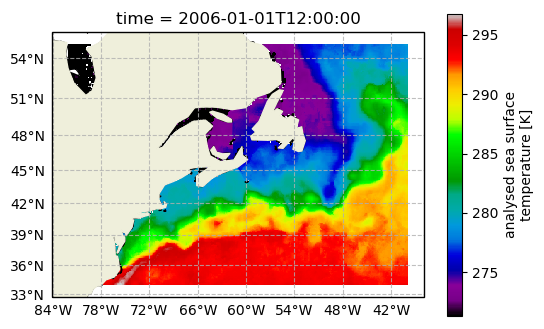

In [8]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
ds['analysed_sst'][0].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='nipy_spectral')
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [9]:
sstc = ds['analysed_sst']-273.15

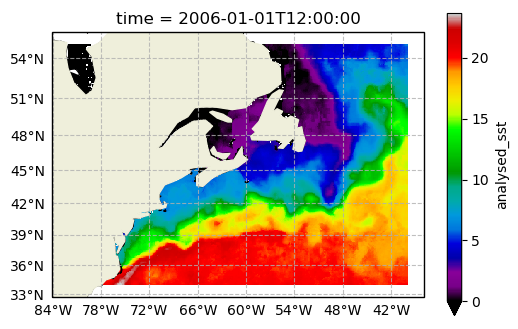

In [10]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
sstc[0].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='nipy_spectral',vmin=0.)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [11]:
sstc.name = 'sst'

In [12]:
sstc.encoding.update({'standard_name':'sea_surface_temperature','units':'C'})

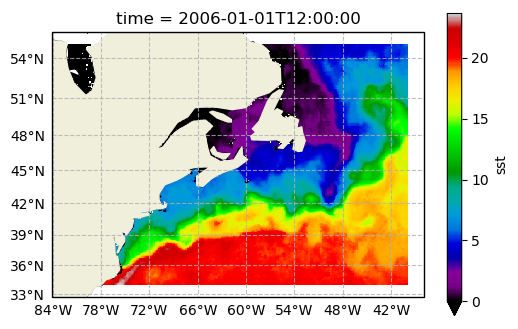

In [13]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
sstc[0].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='nipy_spectral',vmin=0.)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [14]:
sstc = sstc.sel(lat=slice(36,48),lon=slice(-72,54))

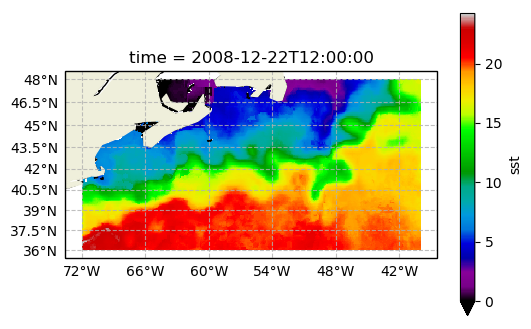

In [15]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
sstc[-10].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='nipy_spectral',vmin=0.)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [16]:
msst = sstc.mean(dim=['lon','lat'])

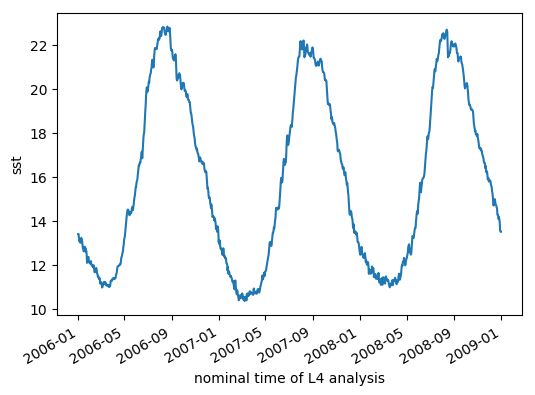

In [17]:
msst.plot()

In [18]:
sstc -= msst

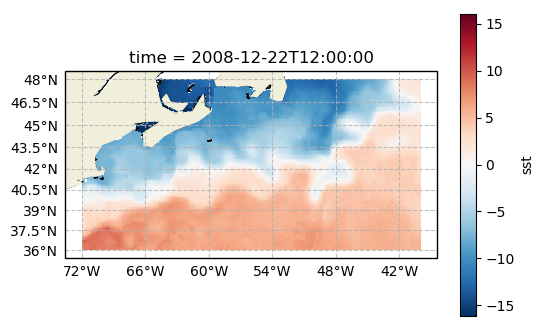

In [19]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
sstc[-10].plot(ax=ax,transform=ccrs.PlateCarree())
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

Функция, которая рисует карту!

In [20]:
def plotmap(crs):
    fig = plt.figure(figsize=(6,4))
    ax = plt.axes(projection=crs)
    ax.coastlines('50m')
    ax.add_feature(LAND)
    gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig,ax

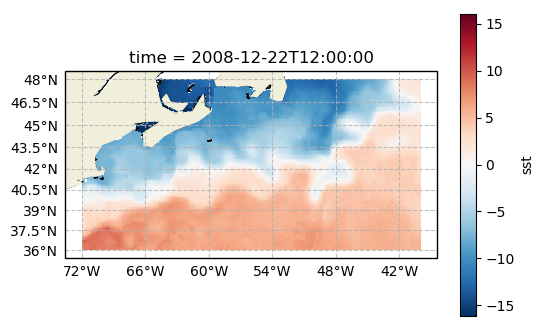

In [21]:
fig,ax = plotmap(crs)
sstc[-10].plot(ax=ax,transform=ccrs.PlateCarree())

In [22]:
sstvar = sstc.var(dim=['time'])

/opt/miniconda/envs/satocean/lib/python3.7/site-packages/xarray/core/nputils.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwds)


In [23]:
sstmean = sstc.mean(dim=['time'])

/opt/miniconda/envs/satocean/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


так как мы постоянно делаем преобразование из цилиндрической проекции, то мы можем сосздать словарь именнованных аргументов

In [24]:
kw = dict(transform=ccrs.PlateCarree())

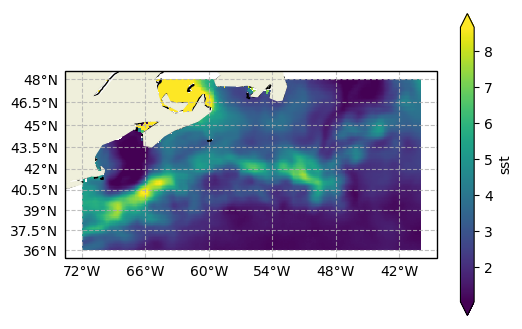

In [25]:
fig,ax = plotmap(crs)
sstvar.plot(ax=ax,robust=True,**kw)

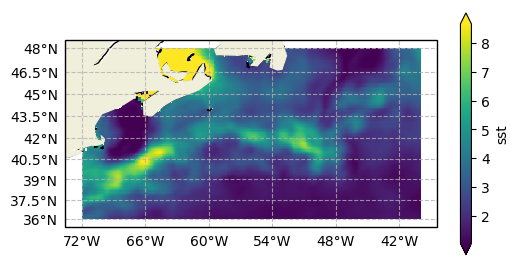

In [26]:
fig,ax = plotmap(crs)
sstvar.plot(ax=ax,robust=True,cbar_kwargs=dict(shrink=0.8),**kw)

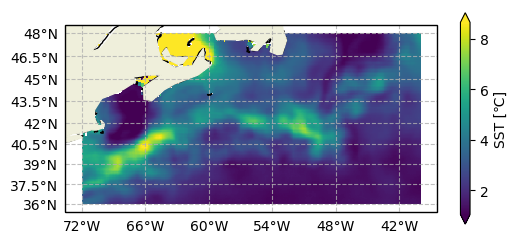

In [27]:
fig,ax = plotmap(crs)
pc = sstvar.plot(ax=ax,robust=True,cbar_kwargs=dict(shrink=0.7),**kw)
pc.colorbar.set_label('SST [\u2103]')

In [28]:
from numpy import arange

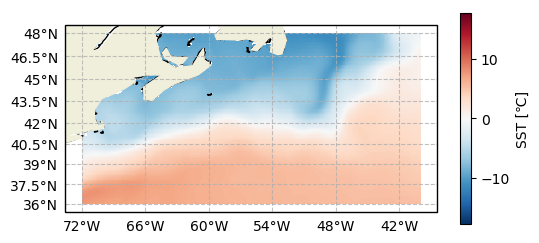

In [29]:
fig,ax = plotmap(crs)
pc = sstmean.plot(ax=ax,cbar_kwargs=dict(shrink=0.7),**kw)
pc.colorbar.set_label('SST [\u2103]')

In [30]:
sstlon = sstc.sel(lon=-50,method='nearest')

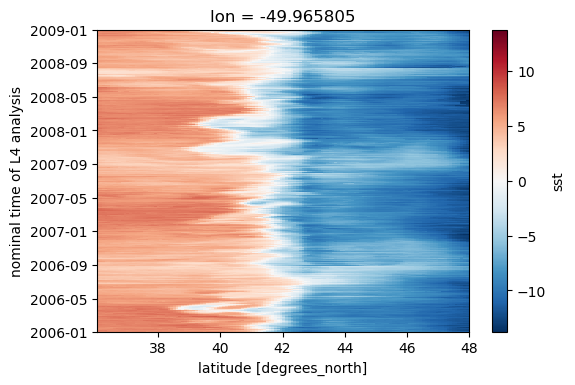

In [31]:
sstlon.plot()

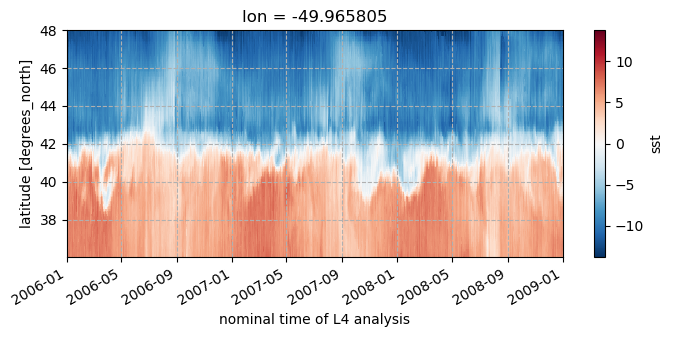

In [32]:
sstlon.plot(x='time',figsize=(8,3))
plt.grid(linestyle='--')

Функция, которая рисует карту на заданных осях

In [33]:
def plotmap_ax(ax):
    ax.add_feature(LAND)
    gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

In [34]:
sst2008 = (ds['analysed_sst']-273.15).sel(time='2008')

In [35]:
sst2008 = sst2008.resample(time='M').mean(dim=['time'])

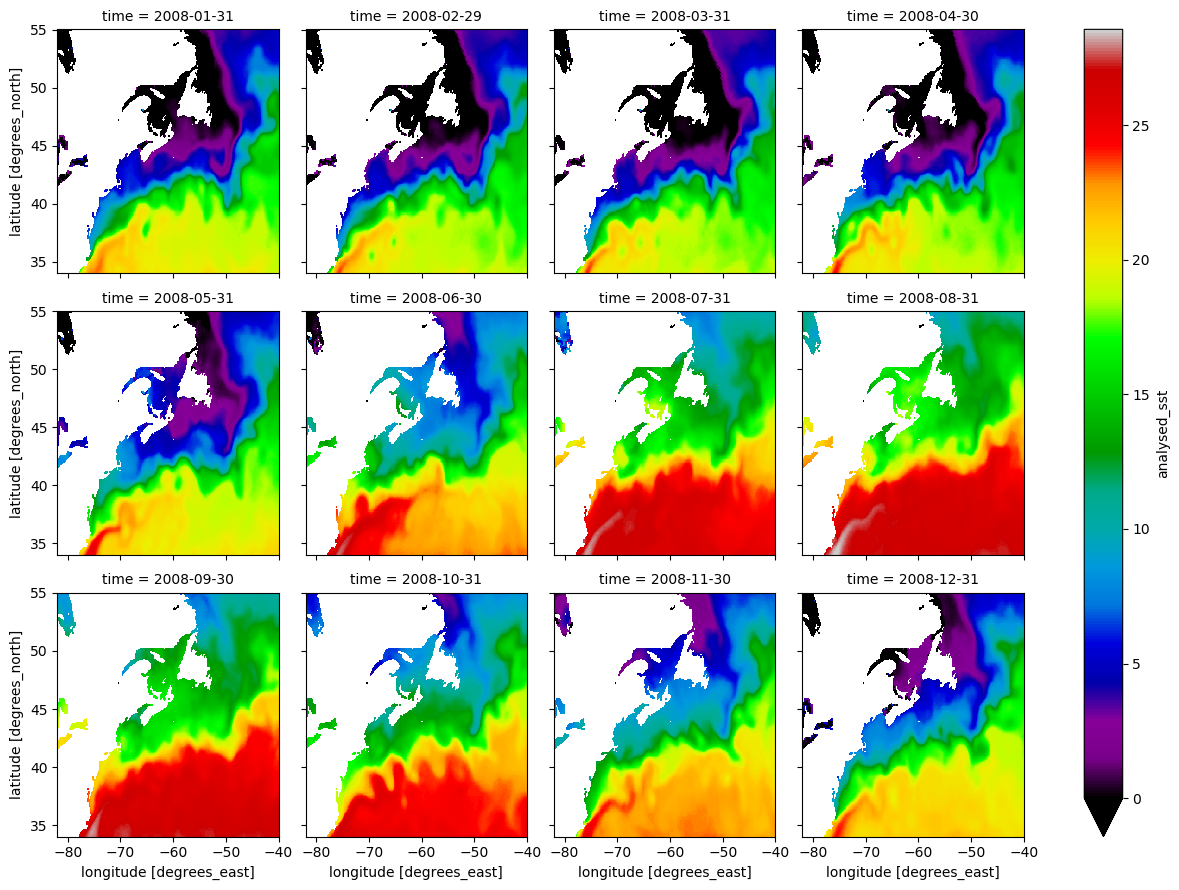

In [36]:
sst2008.plot(col='time',col_wrap=4,vmin=0.,cmap='nipy_spectral')

/opt/miniconda/envs/satocean/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


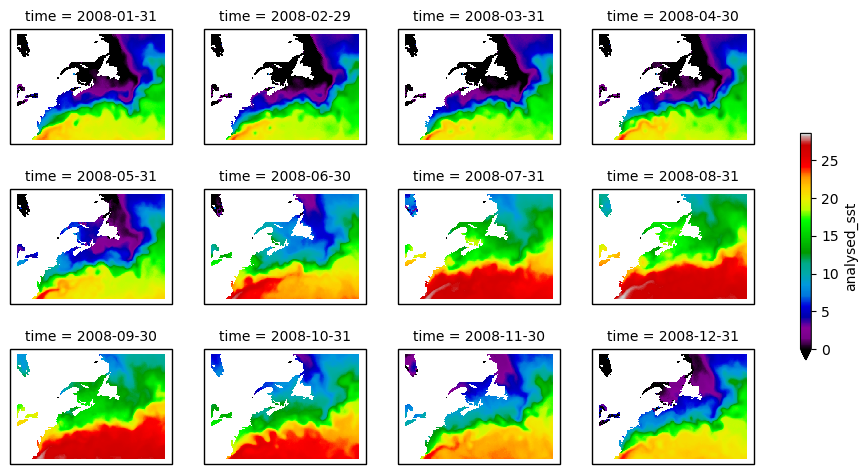

In [37]:
sst2008.plot(figsize=(12,6),transform=ccrs.PlateCarree(),col='time',col_wrap=4,
             vmin=0.,cmap='nipy_spectral',subplot_kws=dict(projection=crs),cbar_kwargs=dict(shrink=0.5))

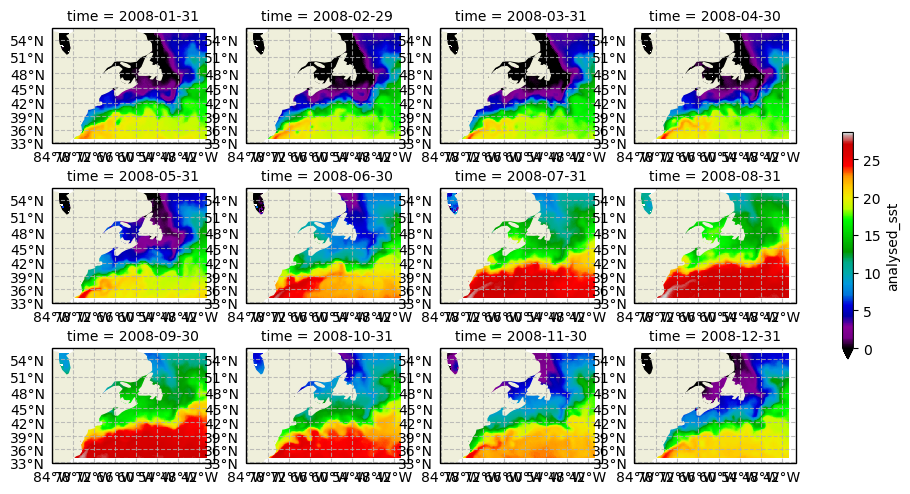

In [38]:
fg = sst2008.plot(figsize=(12,6),transform=ccrs.PlateCarree(),col='time',col_wrap=4,
             vmin=0.,cmap='nipy_spectral',subplot_kws=dict(projection=crs),cbar_kwargs=dict(shrink=0.5))
for ax in fg.axes.flatten():
    plotmap_ax(ax)

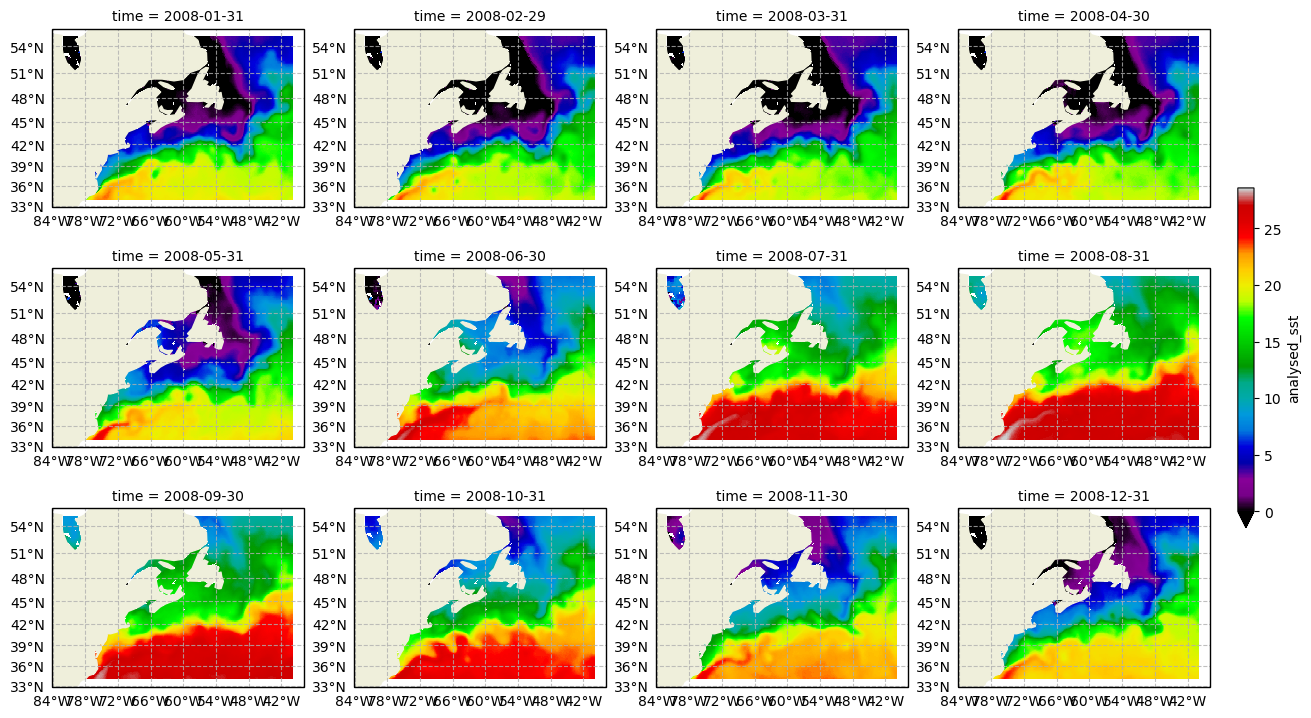

In [39]:
fg = sst2008.plot(figsize=(18,9),transform=ccrs.PlateCarree(),col='time',col_wrap=4,
             vmin=0.,cmap='nipy_spectral',subplot_kws=dict(projection=crs),cbar_kwargs=dict(shrink=0.5,pad=0.02))
for ax in fg.axes.flatten():
    plotmap_ax(ax)

Не очень красиво... Проблема в том, что подписи ставит cartopy... надо модифицировать отображение подписей

Что такое fg.axes?

In [40]:
fg.axes

array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7ff16f5baa58>,
      dtype=object)

Это np.array объектов размерностью 3 на 4

In [41]:
fg.axes.shape

(3, 4)

In [42]:
import numpy as np

/opt/miniconda/envs/satocean/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


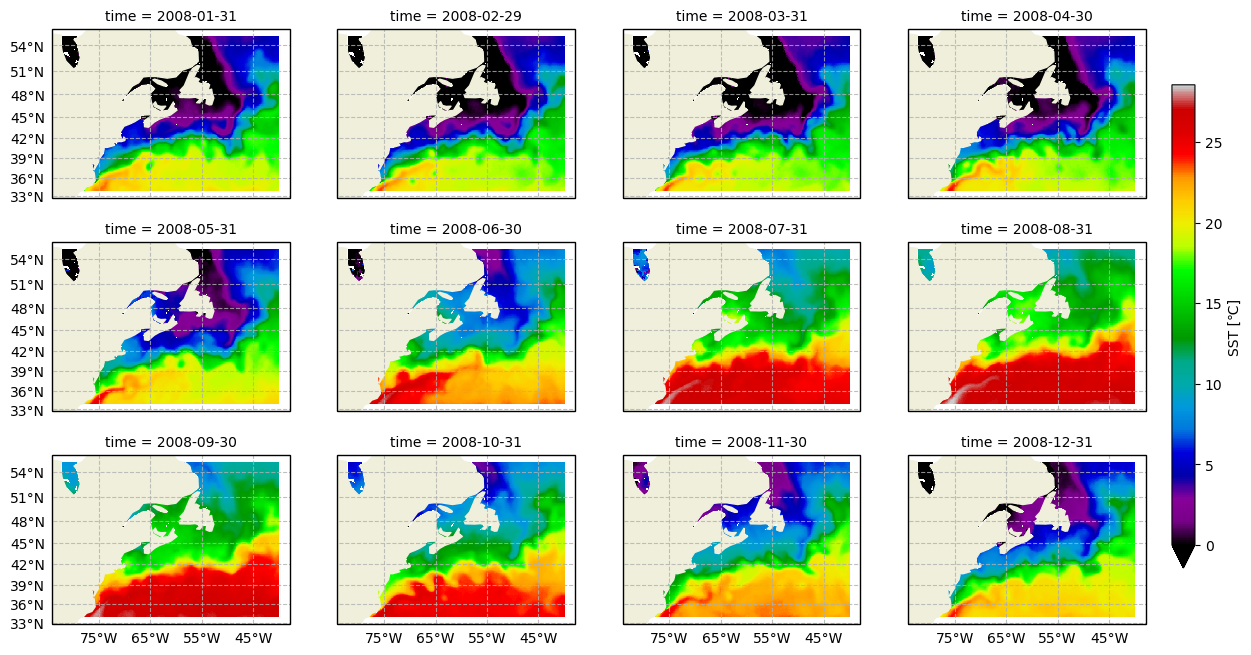

In [43]:
fg = sst2008.plot(figsize=(17,8),transform=ccrs.PlateCarree(),col='time',col_wrap=4,
             vmin=0.,cmap='nipy_spectral',subplot_kws=dict(projection=crs),cbar_kwargs=dict(shrink=0.8,pad=0.02,label='SST [\u2103]'))
jm,im = fg.axes.shape
for ji in range(jm):
    for ii in range(im):
        gl = fg.axes[ji,ii].gridlines(linestyle='--',alpha=0.8,
                                      xlocs=np.arange(-85,-20,10),draw_labels=False)
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER

        fg.axes[ji,ii].add_feature(LAND)
        if ii==0:
            gl.ylabels_left = True
        if ji==jm-1:
            gl.xlabels_bottom = True


А помните groupby в pandas?

Среднемесячная климатология в одну строку

In [44]:
sstc = (ds['analysed_sst']-273.15)

In [45]:
sstclim = sstc.groupby('time.month').mean(dim='time')

In [46]:
def plot_labels(axes,**kw):
    jm,im = axes.shape
    for ji in range(jm):
        for ii in range(im):
            gl = axes[ji,ii].gridlines(linestyle='--',alpha=0.8,draw_labels=False,**kw)
            gl.xformatter = LONGITUDE_FORMATTER
            gl.yformatter = LATITUDE_FORMATTER
            if ii==0:
                gl.ylabels_left = True
            if ji==jm-1:
                gl.xlabels_bottom = True

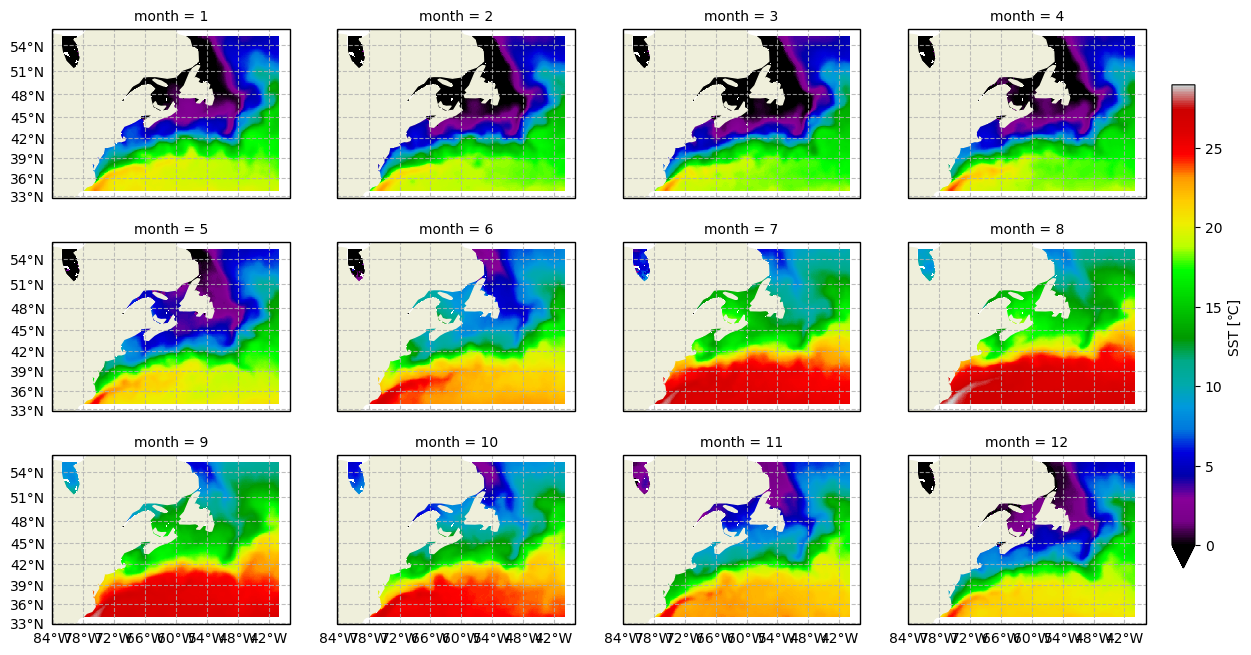

In [47]:
fg = sstclim.plot(figsize=(17,8),transform=ccrs.PlateCarree(),col='month',col_wrap=4,
             vmin=0.,cmap='nipy_spectral',subplot_kws=dict(projection=crs),cbar_kwargs=dict(shrink=0.8,pad=0.02,label='SST [\u2103]'))
for ax in fg.axes.flatten():
    ax.add_feature(LAND)
plot_labels(fg.axes)



In [48]:
sstclimseason = sstc.groupby('time.season').mean(dim='time')

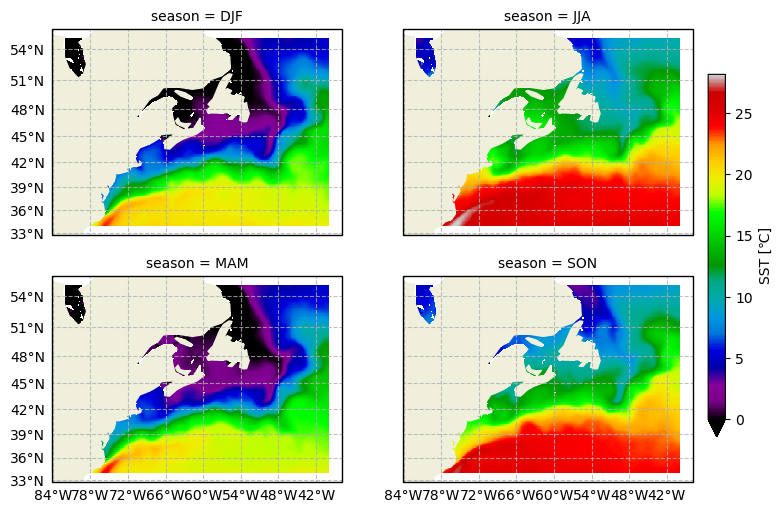

In [49]:
fg = sstclimseason.plot(figsize=(10,6),transform=ccrs.PlateCarree(),col='season',col_wrap=2,
             vmin=0.,cmap='nipy_spectral',subplot_kws=dict(projection=crs),cbar_kwargs=dict(shrink=0.8,pad=0.02,label='SST [\u2103]'))
for ax in fg.axes.flatten():
    ax.add_feature(LAND)
plot_labels(fg.axes)



In [50]:
def plotmap(crs,r='50m'):
    fig = plt.figure(figsize=(6,4))
    ax = plt.axes(projection=crs)
    if r is not None:
        ax.coastlines(r)
    gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig,ax

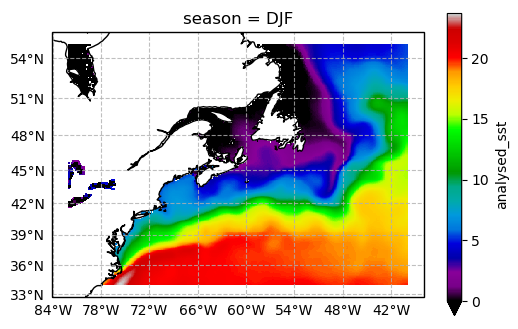

In [51]:
fig,ax = plotmap(crs)
sstclimseason[0].plot(ax=ax,transform=ccrs.PlateCarree(),vmin=0.,
             cmap='nipy_spectral')

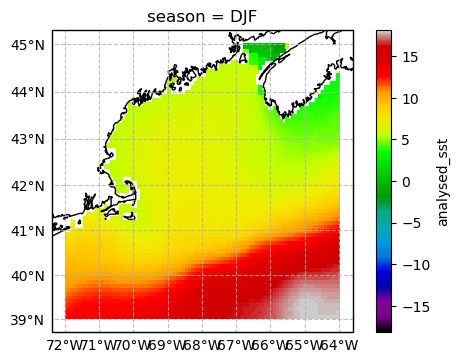

In [52]:
fig,ax = plotmap(crs,r='10m')
sstclimseason.sel(season='DJF',lon=slice(-72,-64),lat=slice(39,45)).plot(ax=ax,transform=ccrs.PlateCarree(),
             cmap='nipy_spectral')

In [53]:
import cartopy.io.img_tiles as cimgt

In [54]:
osmap = cimgt.OSM()

In [55]:
print(osmap.crs)

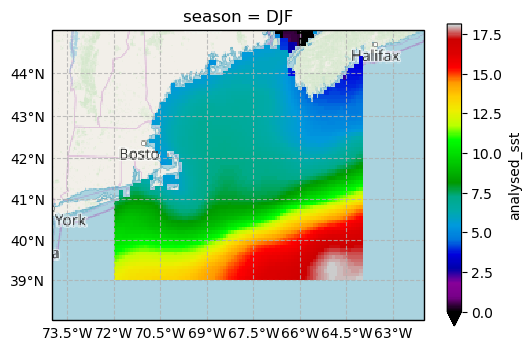

In [56]:
fig,ax = plotmap(osmap.crs,r=None)
sstclimseason.sel(season='DJF',lon=slice(-72,-64),lat=slice(39,45)).plot(ax=ax,transform=ccrs.PlateCarree(),vmin=0.,
             cmap='nipy_spectral')
ax.set_extent([-74,-62,38,45])
ax.add_image(osmap,5)

In [57]:
stamen = cimgt.StamenTerrain()

/opt/miniconda/envs/satocean/lib/python3.7/site-packages/cartopy/io/img_tiles.py:320: UserWarning: The StamenTerrain class was deprecated in v0.17. Please use Stamen('terrain-background') instead.
  "The StamenTerrain class was deprecated in v0.17. "


In [58]:
print(stamen.crs)

In [59]:
kw = dict(levels=15,vmin=0.,transform=ccrs.PlateCarree())

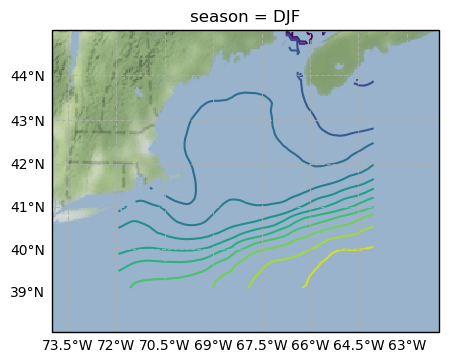

In [60]:
fig,ax = plotmap(osmap.crs,r=None)
cf = sstclimseason.sel(season='DJF',lon=slice(-72,-64),lat=slice(39,45)).plot.contour(ax=ax,**kw)
ax.set_extent([-74,-62,38,45])
ax.add_image(stamen,5)

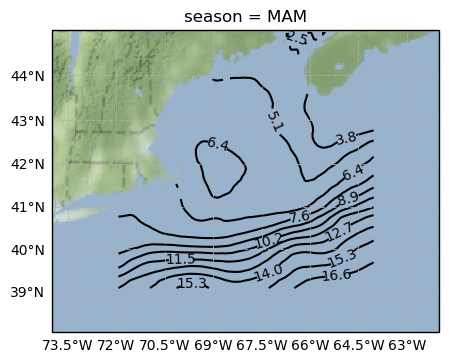

In [61]:
fig,ax = plotmap(osmap.crs,r=None)
cf = sstclimseason.sel(season='MAM',lon=slice(-72,-64),lat=slice(39,45)).plot.contour(ax=ax,colors='k',**kw)
cf.clabel(fmt='%3.1f')
ax.set_extent([-74,-62,38,45])
ax.add_image(stamen,5)

In [62]:
url = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'BlueMarble_NextGeneration'

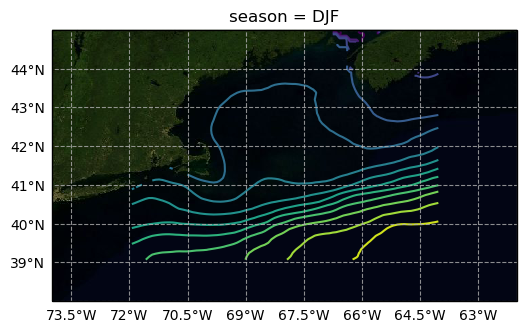

In [63]:
fig,ax = plotmap(ccrs.PlateCarree(),r=None)
ax.set_extent([-74,-62,38,45])
ax.add_wmts(url,layer)
cf = sstclimseason.sel(season='DJF',lon=slice(-72,-64),lat=slice(39,45)).plot.contour(ax=ax,**kw)